<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/Copy_of_Employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model for Predicting Employee Attrition
We are building a simple model using the ***employee_attrition_test.csv*** data set for predicting an employee attrition. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo & Nancy Wachira Date: 5/15/2021


In [1]:
#data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



**1. Read dataset and display columns¶**


In [2]:
hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')



# Explotaroty Data Analysis

In [4]:
#Data Exploration/Analysis
hr_attrition_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

***Training set has 1029 examples and 34 features + te target variable (attrition) 3 of the features are floats, 23 are integer and 9 are objects***

In [5]:
hr_attrition_train_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [6]:
#Let’s take a more detailed look at what data is actually missing:
total = hr_attrition_train_df.isnull().sum().sort_values(ascending=False)
percent_1 = hr_attrition_train_df.isnull().sum()/hr_attrition_train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)



,Total,%
Age,136,13.2
DistanceFromHome,95,9.2
DailyRate,27,2.6
BusinessTravel,5,0.5
MaritalStatus,5,0.5


The **BusinessTravel** and **MaritalStatus** has 5 features missing values, which can easily be filled. It will be much more tricky, to deal with the **‘Age’** feature, which has 136 missing values. The **DistanceFromHome** feature needs further investigation it is missing 95, and **DailyRate** feature is missing 27.


In [7]:
hr_attrition_train_df.describe()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


**hh**

In [8]:
hr_attrition_train_df.shape

(1029, 35)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


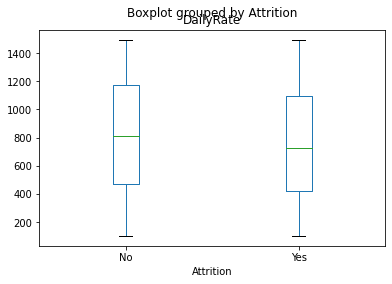

In [9]:
hr_attrition_train_df.boxplot(by ='Attrition', column =['DailyRate'], grid = False)


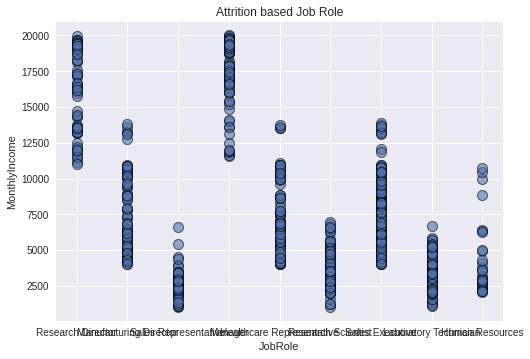

In [19]:
#Attrition = hr_attrition_train_df['Attrition']
plt.style.use('seaborn')  # to get seaborn scatter plot

JobRole = hr_attrition_train_df['JobRole']
YearsAtCompany = hr_attrition_train_df['YearsAtCompany']

plt.scatter(JobRole, MonthlyIncome, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('Attrition based Job Role')
plt.xlabel('JobRole')
plt.ylabel('MonthlyIncome')

plt.bar
plt.show()

In [ ]:
EducationField            

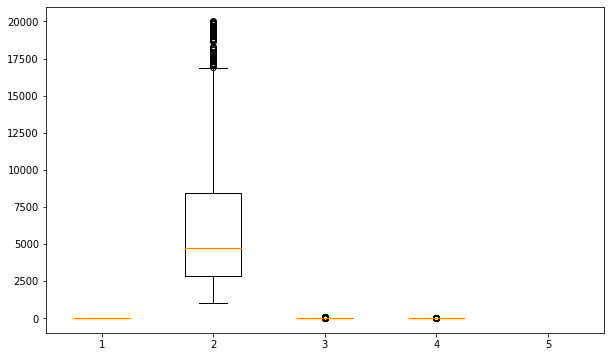

In [10]:

Education = hr_attrition_train_df['Education']
MonthlyIncome = hr_attrition_train_df['MonthlyIncome']
YearsAtCompany = hr_attrition_train_df['YearsAtCompany']
PerformanceRating = hr_attrition_train_df['PerformanceRating']
Age = hr_attrition_train_df['Age']
columns = [Education, MonthlyIncome,YearsAtCompany,PerformanceRating,Age]
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(columns)
plt.show()

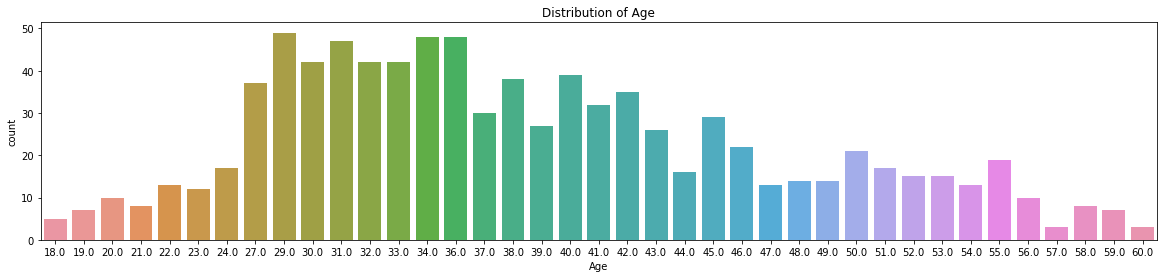

In [ ]:
# See the distribution of gender to recognize different distributions
plt.subplots(figsize=(20,4))
sns.countplot(x='Age', data=hr_attrition_train_df);
plt.title('Distribution of Age');


#What Features Are Linked To Employee Attrition?


In [ ]:
bins = [18, 25, 45, 60, np.inf]
labels = ['Teenager', 'Young', 'adult', 'elder']
age_groups = pd.cut(hr_attrition_train_df.Age, bins, labels=labels)
hr_attrition_train_df['age_group'] = age_groups

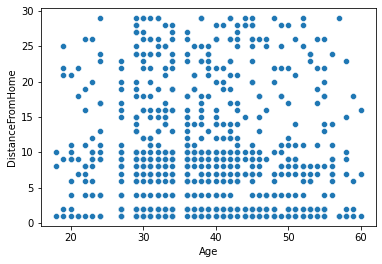

In [ ]:
sns.scatterplot(data=hr_attrition_train_df, x="Age", y="DistanceFromHome")



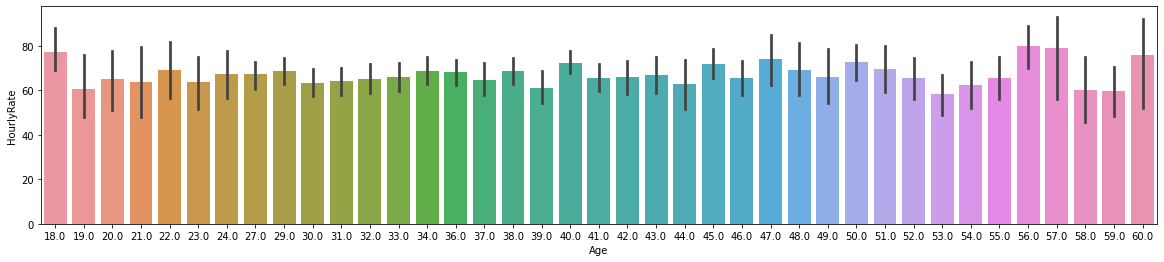

In [ ]:
plt.subplots(figsize=(20,4))
sns.barplot(data=hr_attrition_train_df, x="Age", y="HourlyRate")


In [ ]:
hr_attrition_train_df['Attrition'].value_counts()

No     853
Yes    176
Name: Attrition, dtype: int64

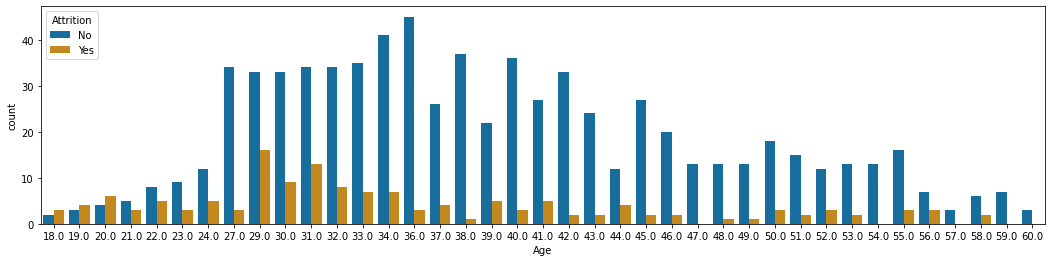

In [ ]:
#visualize number of number of employees who have left the company
plt.subplots(figsize=(18,4))
sns.countplot(x="Age", hue="Attrition",data=hr_attrition_train_df,palette='colorblind')


In [ ]:
#print all the data types and thier unique values
for column in hr_attrition_train_df.columns:
  if hr_attrition_train_df[column].dtype==object:
    print(str(column)+':'+str(hr_attrition_train_df[column].unique()))
    print(hr_attrition_train_df[column].value_counts())
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

Attrition:['No' 'Yes']
No     853
Yes    176
Name: Attrition, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Travel_Rarely        723
Travel_Frequently    199
Non-Travel           102
Name: BusinessTravel, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Department:['Research & Development' 'Sales' 'Human Resources']
Research & Development    676
Sales                     311
Human Resources            42
Name: Department, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
EducationField:['Medical' 'Marketing' 'Life Sciences' 'Technical Degree'
 'Human Resources' 'Other']
Life Sciences       426
Medical             328
Marketing           110
Technical Degree     82
Other                66
Human Resources      17
Name: EducationField, dtype: int64
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender:['Male' 'Female']
Male      617
F

In [ ]:
#remove undeeded columns 


In [ ]:
train.drop